In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
import re

path = './log/' # the files in log are generated by the script "/individual_inv/change_reg_vel.sh"
files = os.listdir(path)
print(files)

['20.out', '1000.out', '100.out', '50.out', '10.out', '5.out', '500.out']


In [3]:
result = []
out_files = []
for file in files:
    if file.endswith('.out'):
        with open(os.path.join(path, file), 'r') as f:
            lines = f.readlines()
            if len(lines) >= 100:
                line = lines[100]
                print(line)
                result.append(line.split())
        out_files.append(file)
print(result)

  100         473.601         393.094         4.02536  231

  100         1008.36         785.745        0.222613  233

  100         603.828         517.413        0.864146  241

  100         547.117         445.587         2.03061  235

  100         424.072         344.116         7.99563  233

  100         371.253         295.577         15.1351  223

  100         824.295         610.083        0.428424  237

[['100', '473.601', '393.094', '4.02536', '231'], ['100', '1008.36', '785.745', '0.222613', '233'], ['100', '603.828', '517.413', '0.864146', '241'], ['100', '547.117', '445.587', '2.03061', '235'], ['100', '424.072', '344.116', '7.99563', '233'], ['100', '371.253', '295.577', '15.1351', '223'], ['100', '824.295', '610.083', '0.428424', '237']]


In [4]:
model_misfit = []
data_misfit = []
for iter in result:
    model_misfit.append(np.double(iter[3]))
    data_misfit.append(np.double(iter[2]))

print(model_misfit, '\n', data_misfit)

[4.02536, 0.222613, 0.864146, 2.03061, 7.99563, 15.1351, 0.428424] 
 [393.094, 785.745, 517.413, 445.587, 344.116, 295.577, 610.083]


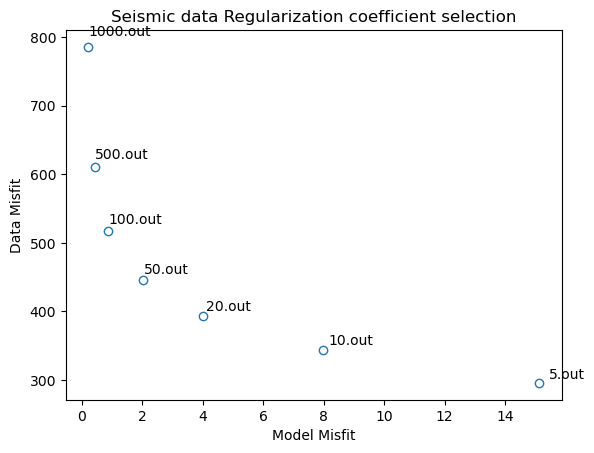

In [5]:
plt.figure()
plt.plot(model_misfit, data_misfit, marker='o', markerfacecolor='none', linestyle='none')
plt.xlabel('Model Misfit')
plt.ylabel('Data Misfit')
plt.title('Seismic data Regularization coefficient selection')
tmp_iter = 0
for i,j in zip(model_misfit,data_misfit):
    plt.text(i*1.02,j*1.02,out_files[tmp_iter])
    tmp_iter = tmp_iter + 1
plt.show()